In [1]:
import pandas as pd
import opendatasets as od
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline 


In [2]:

churn = pd.read_csv('/home/linson/5-Sem/Machine_Intelligence/Project/Churn.csv')
churn.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
churn.shape

(10000, 12)

CREATING TRAINING DATASET

In [4]:
train = churn[churn['churn']==1]
train

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,15737452,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,15672754,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,15768163,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1


DATA VISUALISATION (Before cleaning)

In [5]:
# plot of Age vs Credit_Score(Target Variable)
print("Max age:",max(churn['age']),"\n","Min age: ",min(churn['age']))
print("Max score:",max(churn['credit_score']),"\n","Min score: ",min(churn['credit_score']))


Max age: 92 
 Min age:  18
Max score: 850 
 Min score:  350


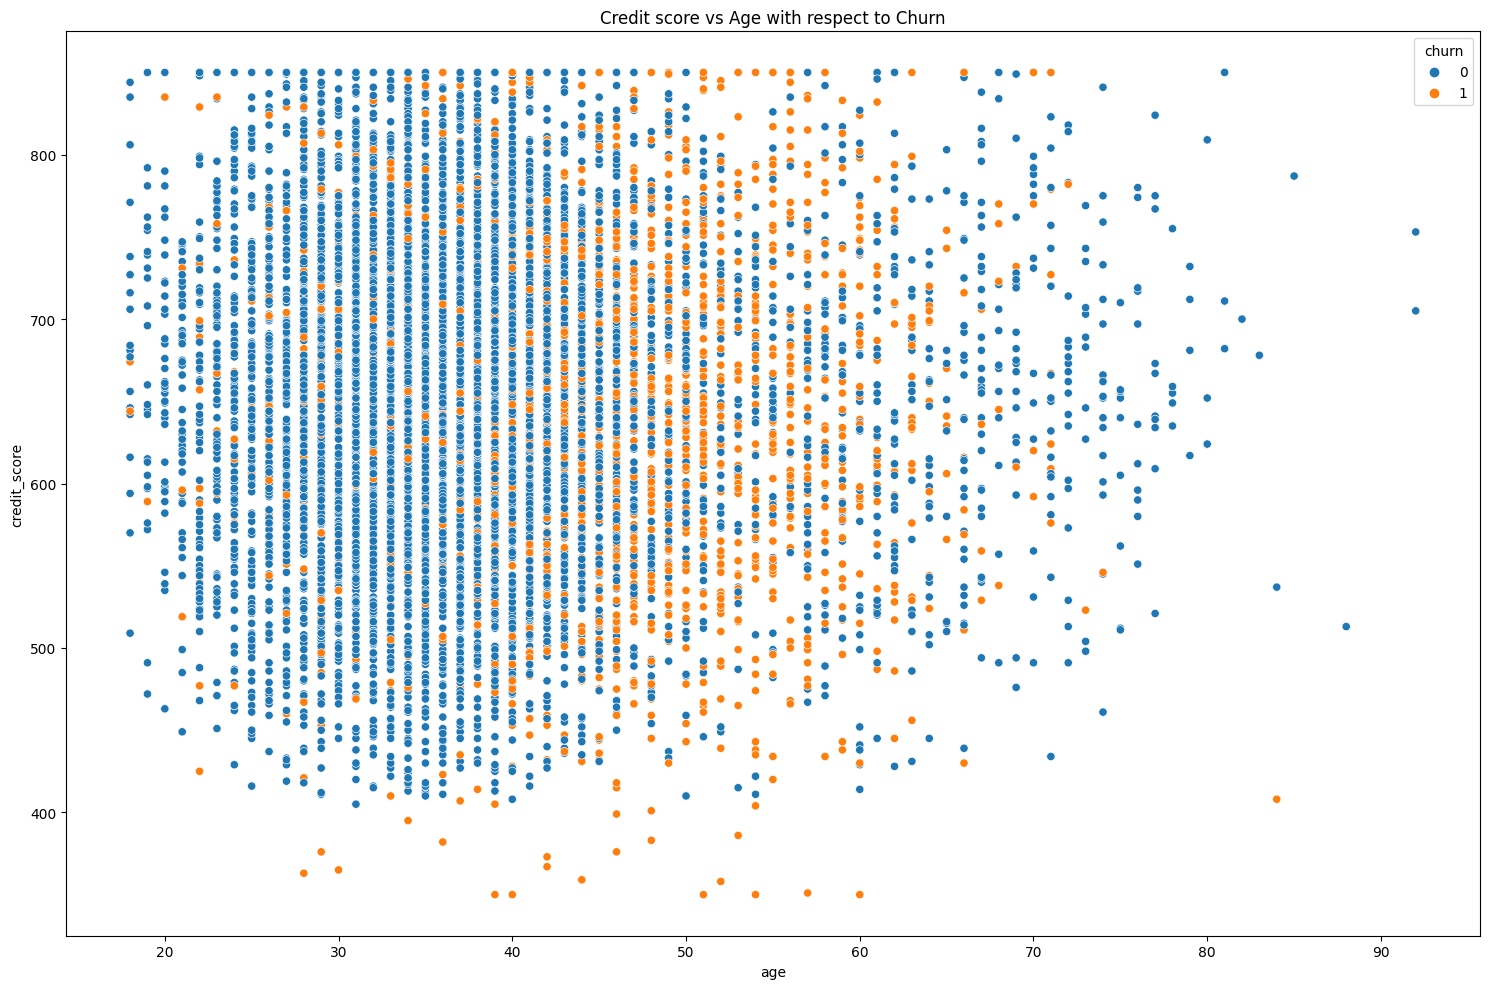

In [6]:
plt.figure(figsize=(15,10),tight_layout=True)
plt.title('Credit score vs Age with respect to Churn')
sns.scatterplot(x=churn['age'],hue=churn['churn'],y=churn['credit_score']);
plt.show()

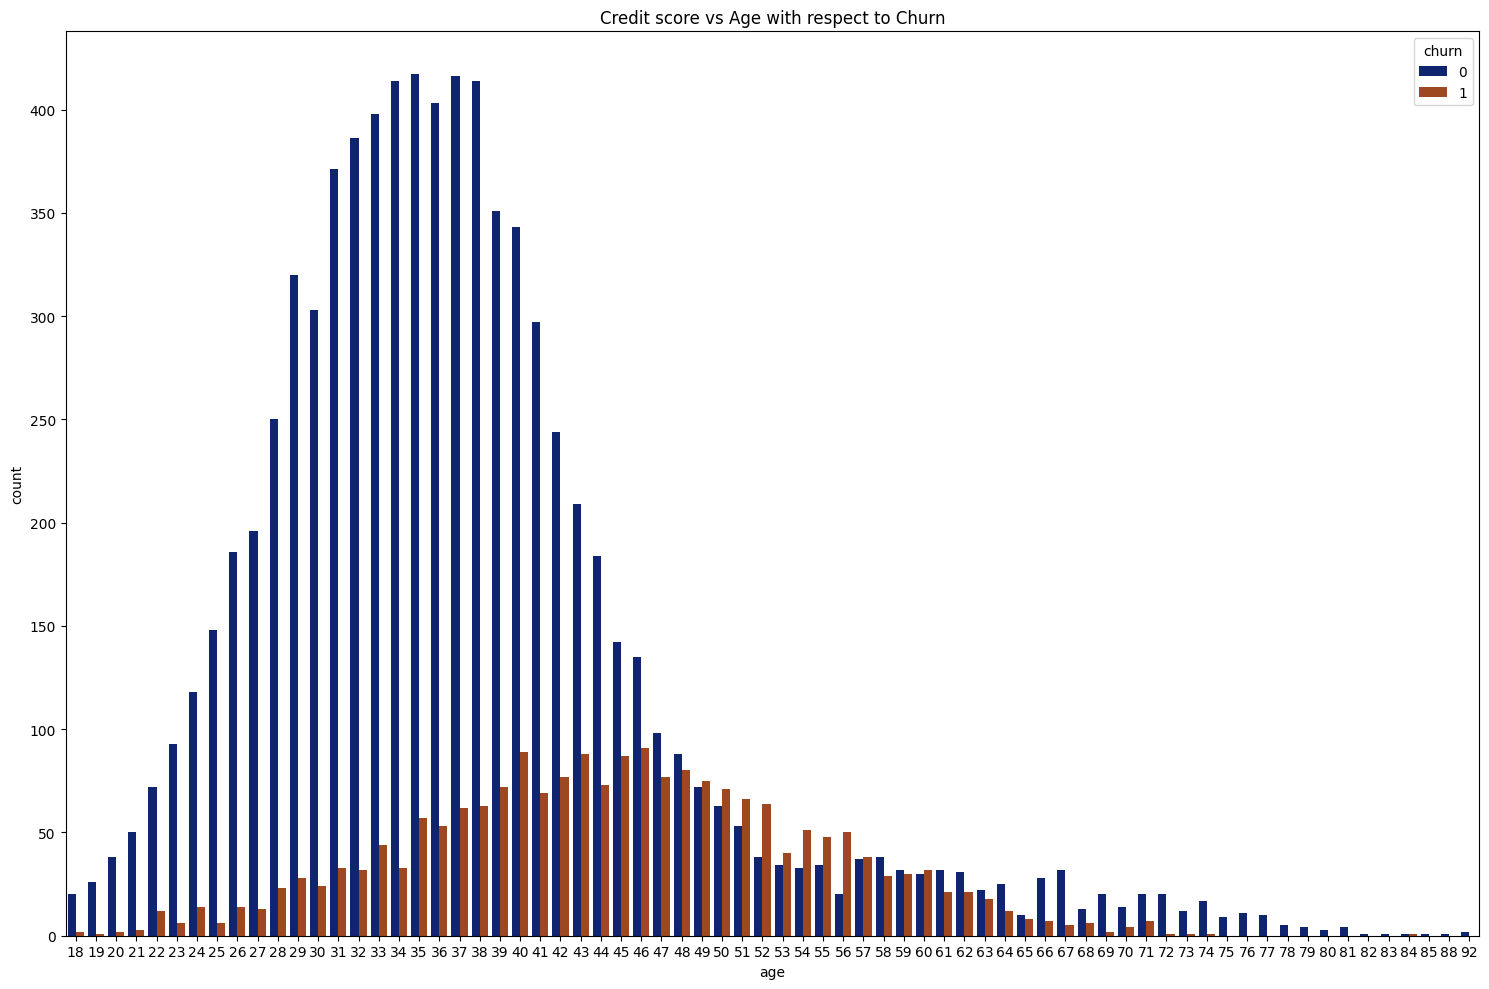

Male_count:  5457 Female_count:  4543


In [7]:
#plot of Gender v\s Churn 
plt.figure(figsize=(15,10),tight_layout=True)
plt.title('Credit score vs Age with respect to Churn')
sns.countplot(x=churn['age'],hue=churn['churn'],palette = 'dark');
plt.show()

m =0
f=0
for col in churn['gender']:
    if(col=='Male'):
        m=m+1
    else:
        f=f+1
print("Male_count: ",m,"Female_count: ",f)



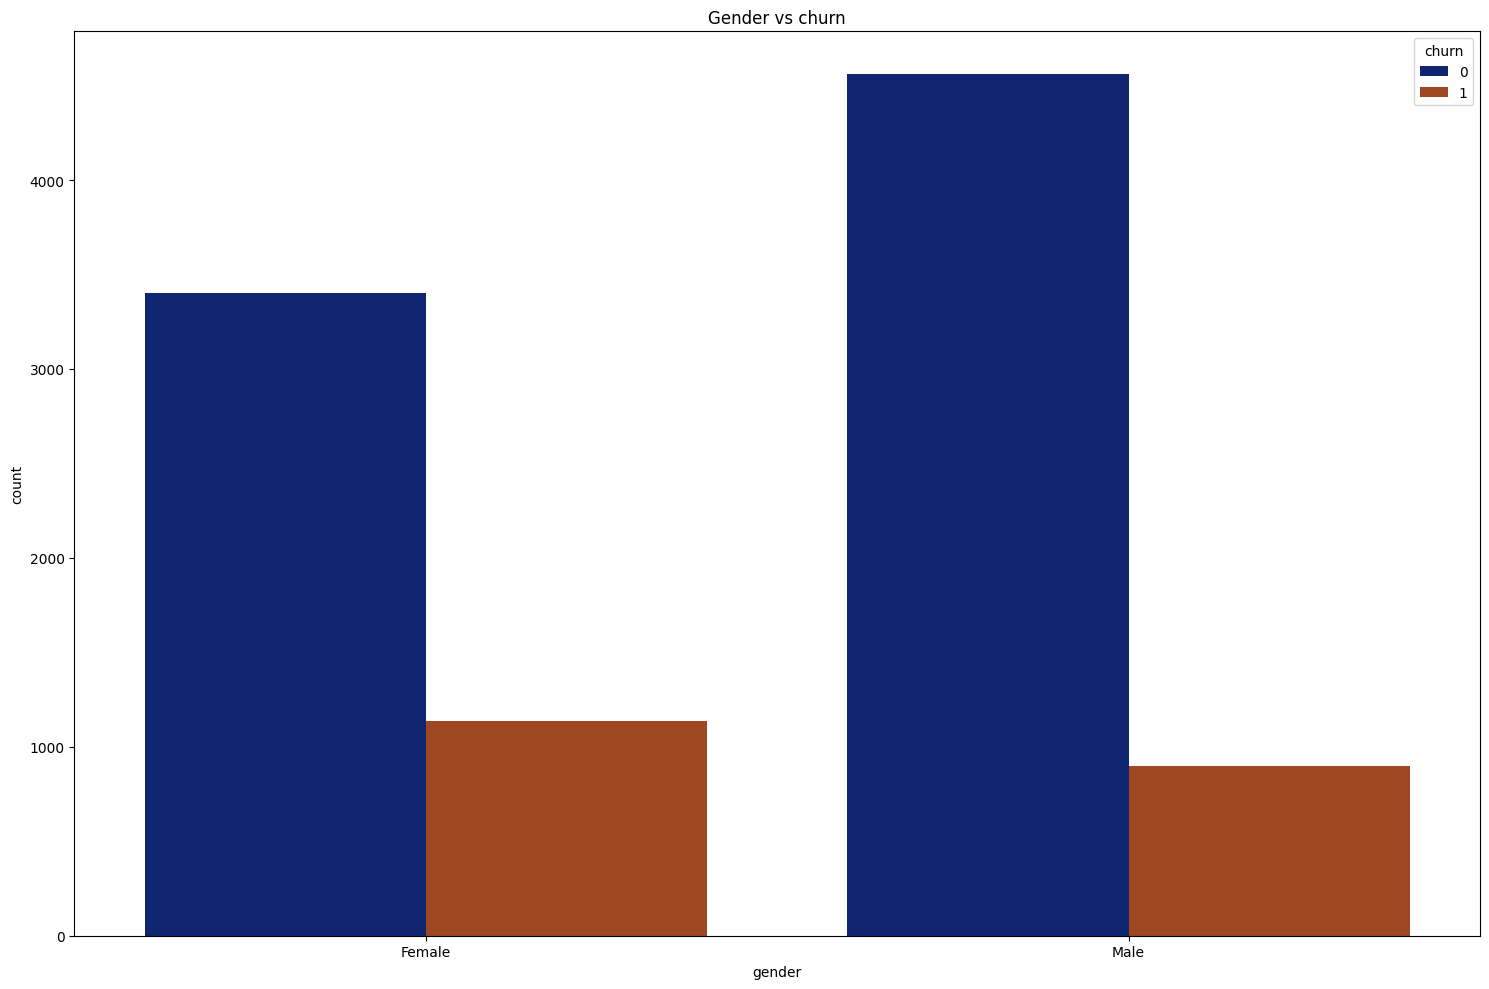

In [8]:
plt.figure(figsize=(15,10),tight_layout=True)
plt.title('Gender vs churn')
sns.countplot(x=churn['gender'],hue=churn['churn'],palette = 'dark');
plt.show()

In [9]:
churn['gender'].replace('Male',1,inplace=True)
churn['gender'].replace('Female',0,inplace=True)

In [10]:
churn

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


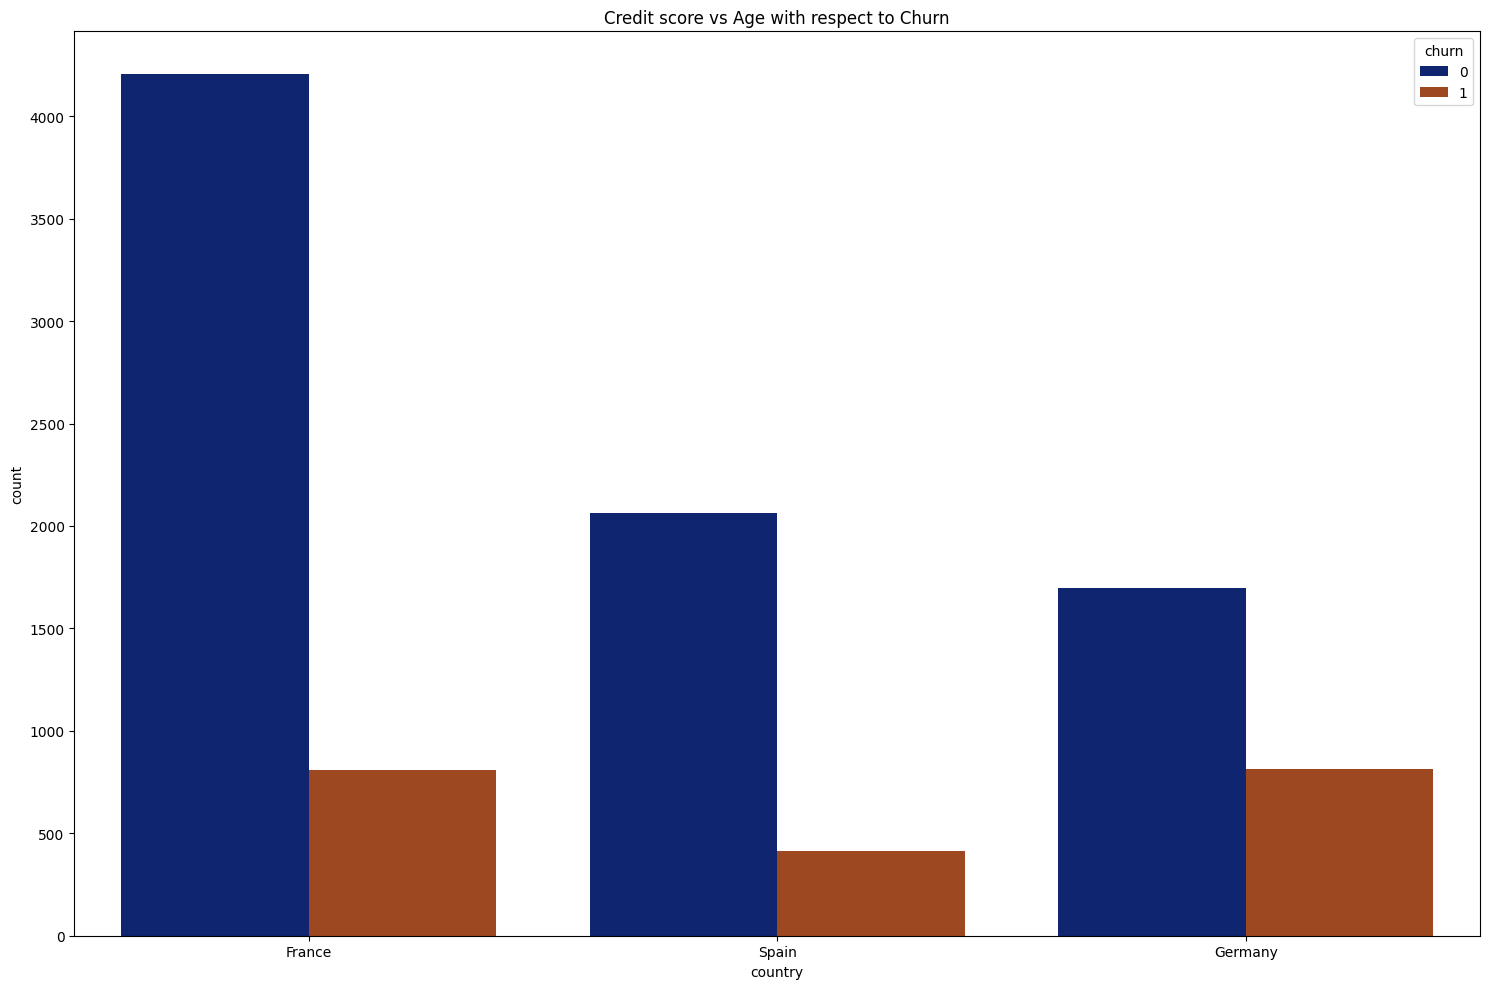

France_count:  5014 
Germany_count:  2509 
Spain count: 2477


In [11]:
#plot of Gender v\s Churn 
plt.figure(figsize=(15,10),tight_layout=True)
plt.title('Credit score vs Age with respect to Churn')
sns.countplot(x=churn['country'],hue=churn['churn'],palette = 'dark');
plt.show()

g=0
f=0
s=0
for col in churn['country']:
    if(col=='France'):
        f=f+1
    elif(col=='Spain'):
        s=s+1
    else:
        g=g+1
print("France_count: ",f,"\nGermany_count: ",g,"\nSpain count:",s)

In [12]:
churn['country'].replace('France',1,inplace=True)
churn['country'].replace('Germany',2,inplace=True)
churn['country'].replace('Spain',3,inplace=True)

In [13]:
churn

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,3,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,3,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,2,1,42,3,75075.31,2,1,0,92888.52,1


Analysis of Balance v/s Churn

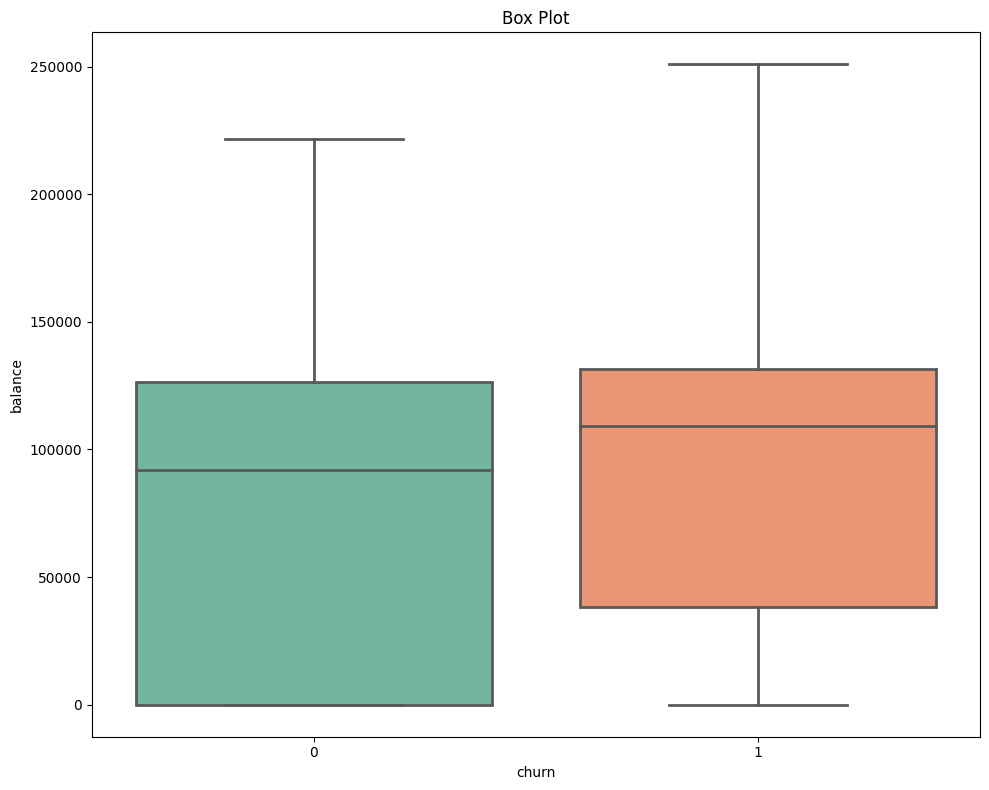

In [14]:
plt.figure(figsize=(10, 8), tight_layout=True)
plt.title('Box Plot')
sns.boxplot (x= 'churn', y= 'balance', data =churn, palette= 'Set2', linewidth=2);
plt.show()


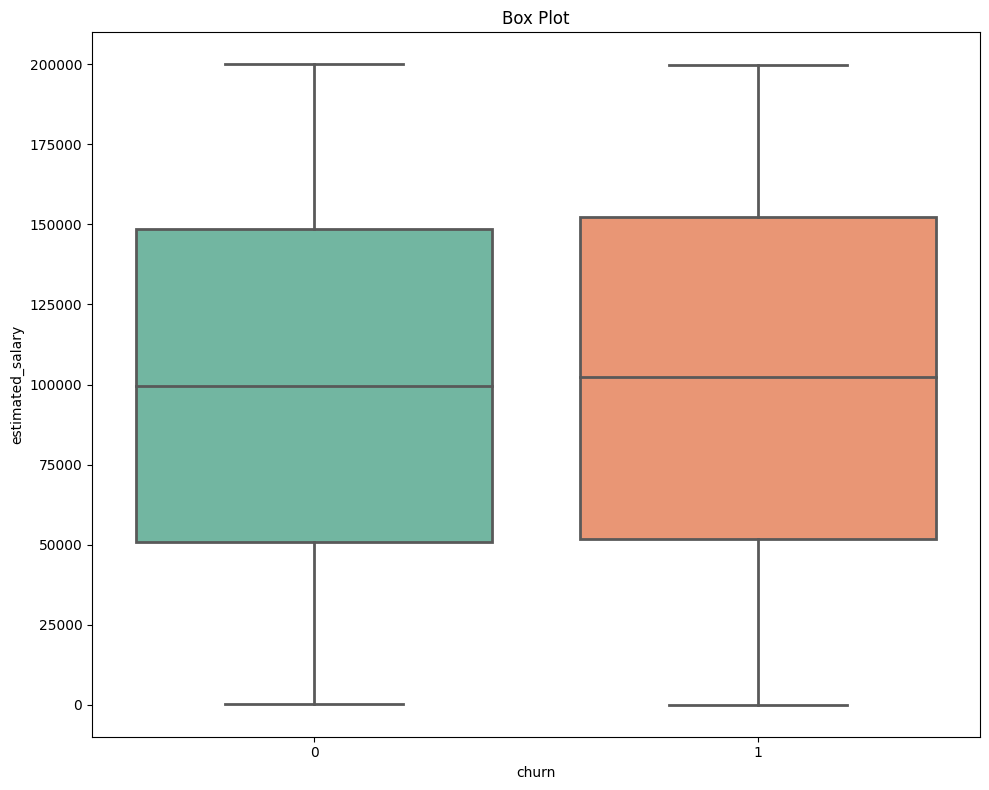

In [15]:
#Analysis of Salary v/s Churn

plt.figure(figsize=(10, 8), tight_layout=True)
plt.title('Box Plot')
sns.boxplot (x= 'churn', y= 'estimated_salary', data =churn, palette= 'Set2', linewidth=2);
plt.show()

In [16]:
# Which Cleary Shows That Estimated Salary is a Insignificant variable 

#Dropping Estimated Salary from the dataset
# churn=churn.drop(['estimated_salary'],axis=1)


In [17]:
#Dropping Account Number since it is irrelevent



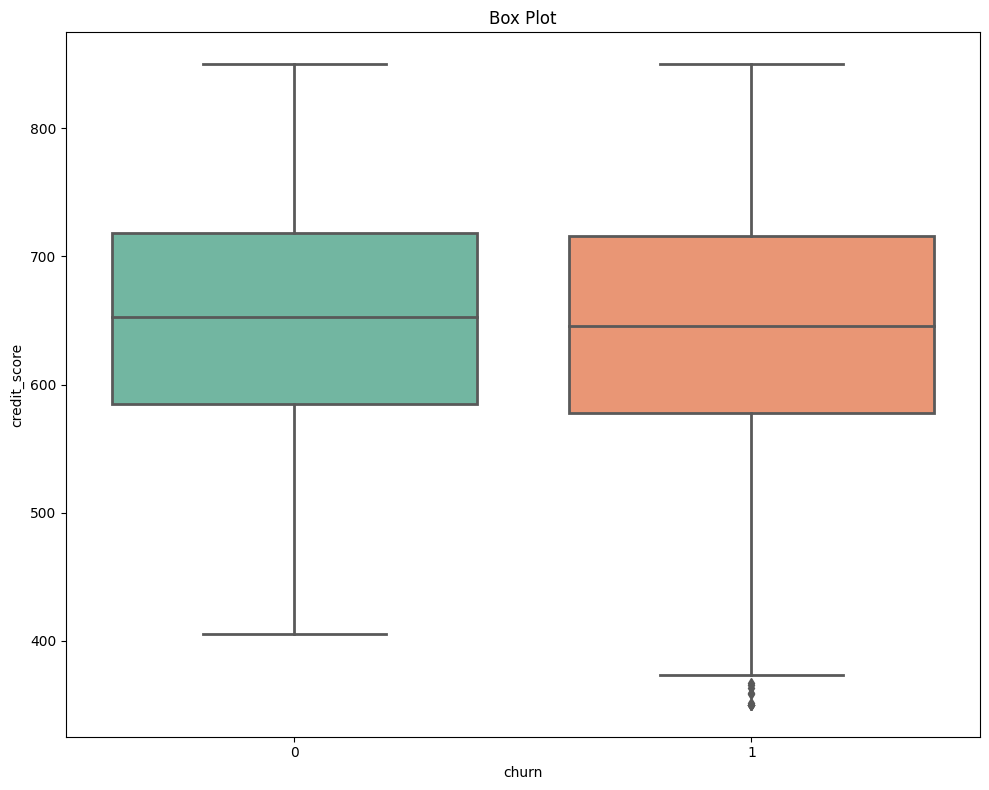

In [18]:
plt.figure(figsize=(10, 8), tight_layout=True)
plt.title('Box Plot')
sns.boxplot (x= 'churn', y= 'credit_score', data =churn, palette= 'Set2', linewidth=2);
plt.show()

Since there are outliers ,We Can Remove Them 

First convert the outlier values to Null

In [19]:
Q1 = np.percentile(churn['credit_score'],25,method='midpoint')
Q3 = np.percentile(churn['credit_score'],75,method='midpoint')

IQR = Q3-Q1

print("Old Shape : ",churn.shape)

upper = np.where(churn['credit_score'] >= (Q3+1.5*IQR))
lower = np.where(churn['credit_score'] <= (Q1-1.5*IQR))

print(min(churn['credit_score']))
print(Q1)
print(Q3)
print(IQR)
churn.drop(upper[0], inplace = True)
churn.drop(lower[0], inplace = True)

print("New Shape: ",churn.shape)




Old Shape :  (10000, 12)
350
584.0
718.0
134.0
New Shape:  (9984, 12)


Checking for Null values

In [20]:
churn.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Correlation analysis for 

(finding Pearson correlation constant p)
    p lies b/w -1 to 1
    large positive value of p depicts high positive correlation
    large negative value of p depicts high negative correlation

In [21]:
# credit card and churn
np.corrcoef(churn['credit_card'],churn['churn'])[0,1]

-0.007911352557775404

That is a very weak correlation

In [22]:
# credit products number  and churn
np.corrcoef(churn['products_number'],churn['churn'])[0,1]

-0.04790465512051012

In [23]:
# credit tenure  and churn
np.corrcoef(churn['tenure'],churn['churn'])[0,1]

-0.013288778973060555

Presence of Credit Card

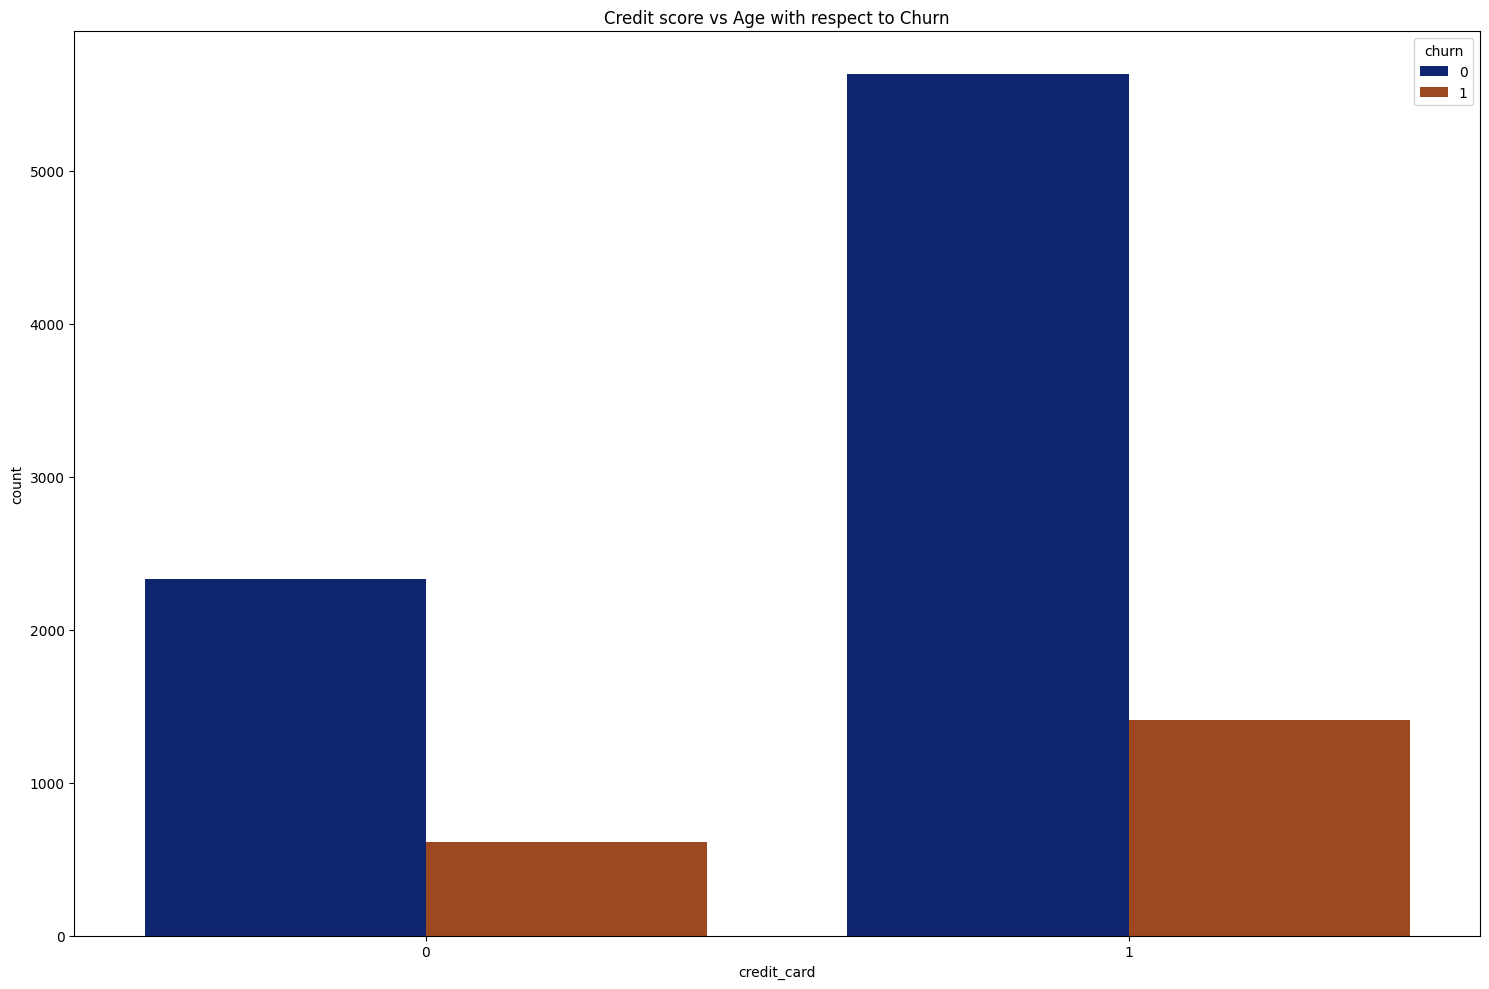

In [24]:
plt.figure(figsize=(15,10),tight_layout=True)
plt.title('Credit score vs Age with respect to Churn')
sns.countplot(x=churn['credit_card'],hue=churn['churn'],palette = 'dark');
plt.show()

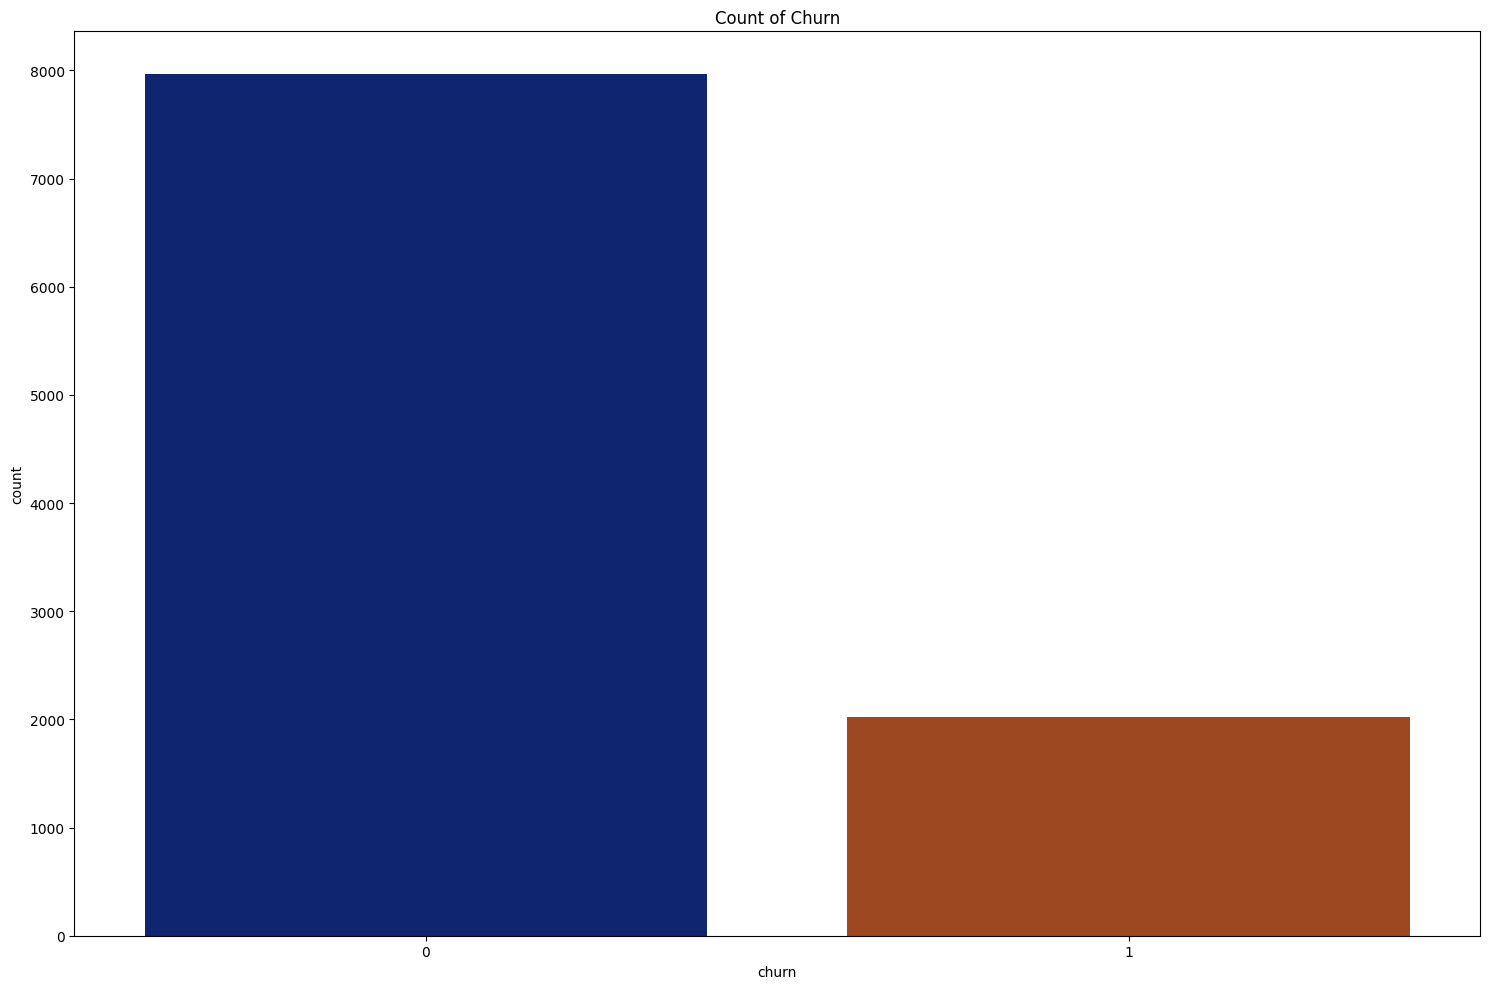

In [25]:
plt.figure(figsize=(15,10),tight_layout=True)
plt.title('Count of Churn')
sns.countplot(x=churn['churn'],palette = 'dark');
plt.show()

In [26]:
X = churn.drop('customer_id',axis = 1)
Y = churn['customer_id']

In [27]:
X.shape

(9984, 11)

In [28]:
Y.shape

(9984,)

Final Infernces  : We can omit things like credit_score and Estimated Salary

Model : Hierarchical Clustering (To Understand The type of people churnin out )
Using ***Gower Distance Matrix***

In [29]:
# taking only churned customers into consideration
X_churn = X.loc[churn['churn']==1]
len(X_churn)

2021

In [30]:
pip install gower

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [31]:
import gower
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch 

data_scaled = normalize(X_churn)
data_scaled = pd.DataFrame(data_scaled, columns=X_churn.columns)

dm = gower.gower_matrix(data_scaled)



In [32]:
z = linkage(dm, method='complete',metric='euclidean')
# plt.figure(figsize=(10, 7))  
# plt.title("Dendrograms")  
# dend = sch.dendrogram(sch.linkage(data_scaled, method='complete'))

/tmp/ipykernel_4149/3672656752.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = linkage(dm, method='complete',metric='euclidean')


{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [25.0, 25.0, 50.0, 50.0],
  [15.0, 15.0, 37.5, 37.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [120.0, 120.0, 142.5, 142.5],
  [92.5, 92.5, 131.25, 131.25],
  [75.0, 75.0, 111.875, 111.875],
  [26.25, 26.25, 93.4375, 93.4375],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [165.0, 165.0, 190.0, 190.0],
  [215.0, 215.0, 225.0, 225.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [220.0, 220.0, 243.75, 243.75],
  [177.5, 177.5, 231.875, 231.875],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [305.0, 305.0, 315.0, 315.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [310.0, 310.0, 332.5, 332.5],
  [282.5, 282.5, 321.25, 321.25],
  [204.6

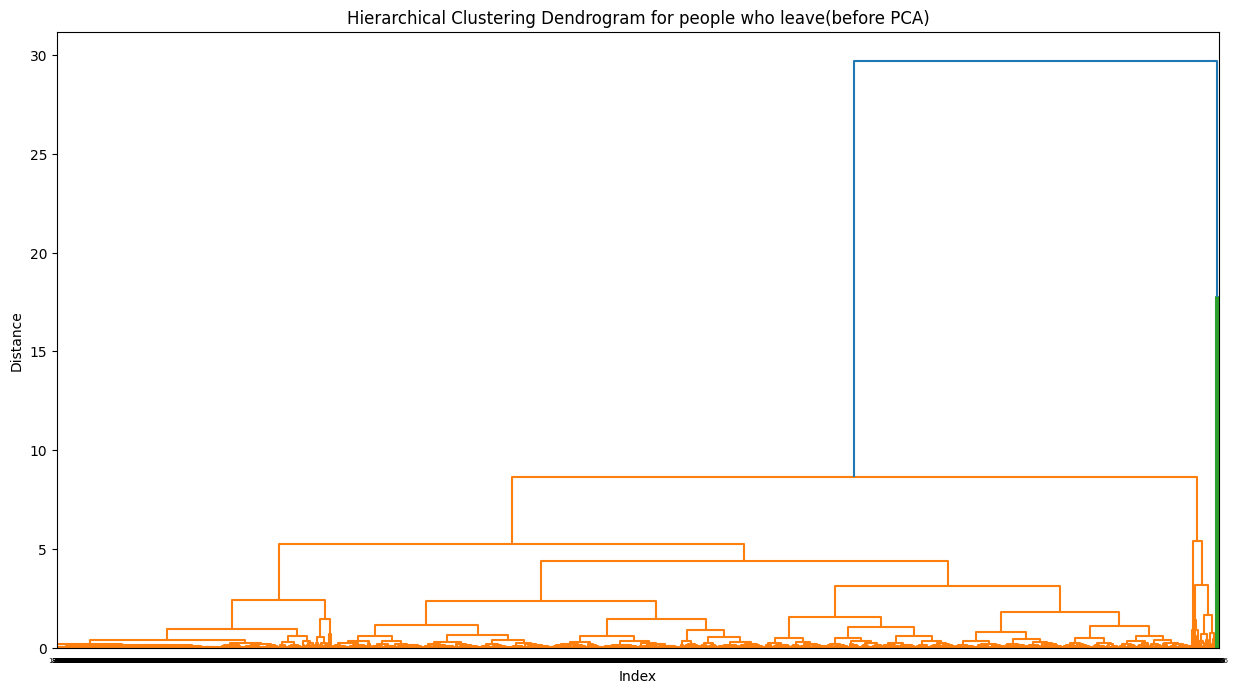

In [33]:
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram for people who leave(before PCA)');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation = 0,  leaf_font_size = 5 ) 

In [34]:
churn_clust = fcluster(z, 3, criterion='maxclust')

In [35]:
churn_clust

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [36]:
# print('Dataset describe results according to the left==1 ')
# churn[churn['churn'] == 1].describe().T.style.background_gradient(subset = ['mean','min','50%', 'max'], cmap = 'RdPu')

In [37]:
X_churn.iloc[:,:].groupby(churn_clust).mean()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1,647.542928,1.801985,0.440695,44.843176,4.93995,91414.802422,1.475434,0.697767,0.362283,101473.489573,1.0
2,684.600000,2.200000,0.400000,48.000000,3.40000,0.000000,1.200000,1.000000,0.200000,1470.714000,1.0
3,556.000000,3.000000,1.000000,38.000000,8.00000,0.000000,2.000000,0.000000,0.000000,417.410000,1.0


In [38]:
X_churn.iloc[:,:].groupby(churn_clust).median()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1,647.0,2.0,0.0,45.0,5.0,109493.62,1.0,1.0,0.0,102397.22,1.0
2,697.0,3.0,0.0,43.0,4.0,0.00,1.0,1.0,0.0,1262.83,1.0
3,556.0,3.0,1.0,38.0,8.0,0.00,2.0,0.0,0.0,417.41,1.0


Inferences  :
There are 6 clusters among the people who have left 

cluster 1 : low credit score ,very good balance ,

In [39]:
X_left = churn.loc[churn['churn']==1]
X_left

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,1,0,42,2,0.00,1,1,1,101348.88,1
2,15619304,502,1,0,42,8,159660.80,3,1,0,113931.57,1
5,15574012,645,3,1,44,8,113755.78,2,1,0,149756.71,1
16,15737452,653,2,1,58,1,132602.88,1,1,0,5097.67,1
22,15699309,510,3,0,38,4,0.00,1,1,0,118913.53,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,15672754,498,2,1,42,3,152039.70,1,1,1,53445.17,1
9982,15768163,655,2,0,46,7,137145.12,1,1,0,115146.40,1
9991,15769959,597,1,0,53,4,88381.21,1,1,0,69384.71,1
9997,15584532,709,1,0,36,7,0.00,1,0,1,42085.58,1


Lets try pca now !

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_left)

X.columns


Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [42]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X_left.columns)

In [43]:
X_scaled_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,-0.760143,-0.293313,-1.073211,-0.887973,-0.291746,-1.001745,-1.562777,-0.593640,0.657509,1.328422,0.002981,0.0
1,-0.970655,-1.493681,-1.073211,-0.887973,-0.291746,1.044265,1.174823,1.905831,0.657509,-0.752773,0.220077,0.0
2,-1.593908,-0.026565,1.597921,1.126161,-0.086839,1.044265,0.387720,0.656096,0.657509,-0.752773,0.838184,0.0
3,0.655151,0.055511,0.262355,1.126161,1.347507,-1.342747,0.710879,-0.593640,0.657509,-0.752773,-1.657686,0.0
4,0.130274,-1.411604,1.597921,-0.887973,-0.701559,-0.319742,-1.562777,-0.593640,0.657509,-0.752773,0.306033,0.0


In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(random_state=42)

In [46]:
pca.fit(X_scaled)

PCA(random_state=42)

In [47]:
pca.components_[0]

array([ 0.11933178, -0.21362425, -0.47951023, -0.31816644,  0.19010593,
        0.03897034, -0.51991824,  0.35082857, -0.15798676,  0.25813739,
        0.29379469,  0.        ])

In [48]:
pca.explained_variance_ratio_

array([0.10410618, 0.10032761, 0.0980809 , 0.09565768, 0.09392024,
       0.09063247, 0.08811868, 0.08678613, 0.0837852 , 0.08133267,
       0.07725224, 0.        ])

In [49]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu


array([0.10410618, 0.20443379, 0.30251469, 0.39817237, 0.49209261,
       0.58272508, 0.67084376, 0.75762989, 0.84141509, 0.92274776,
       1.        , 1.        ])

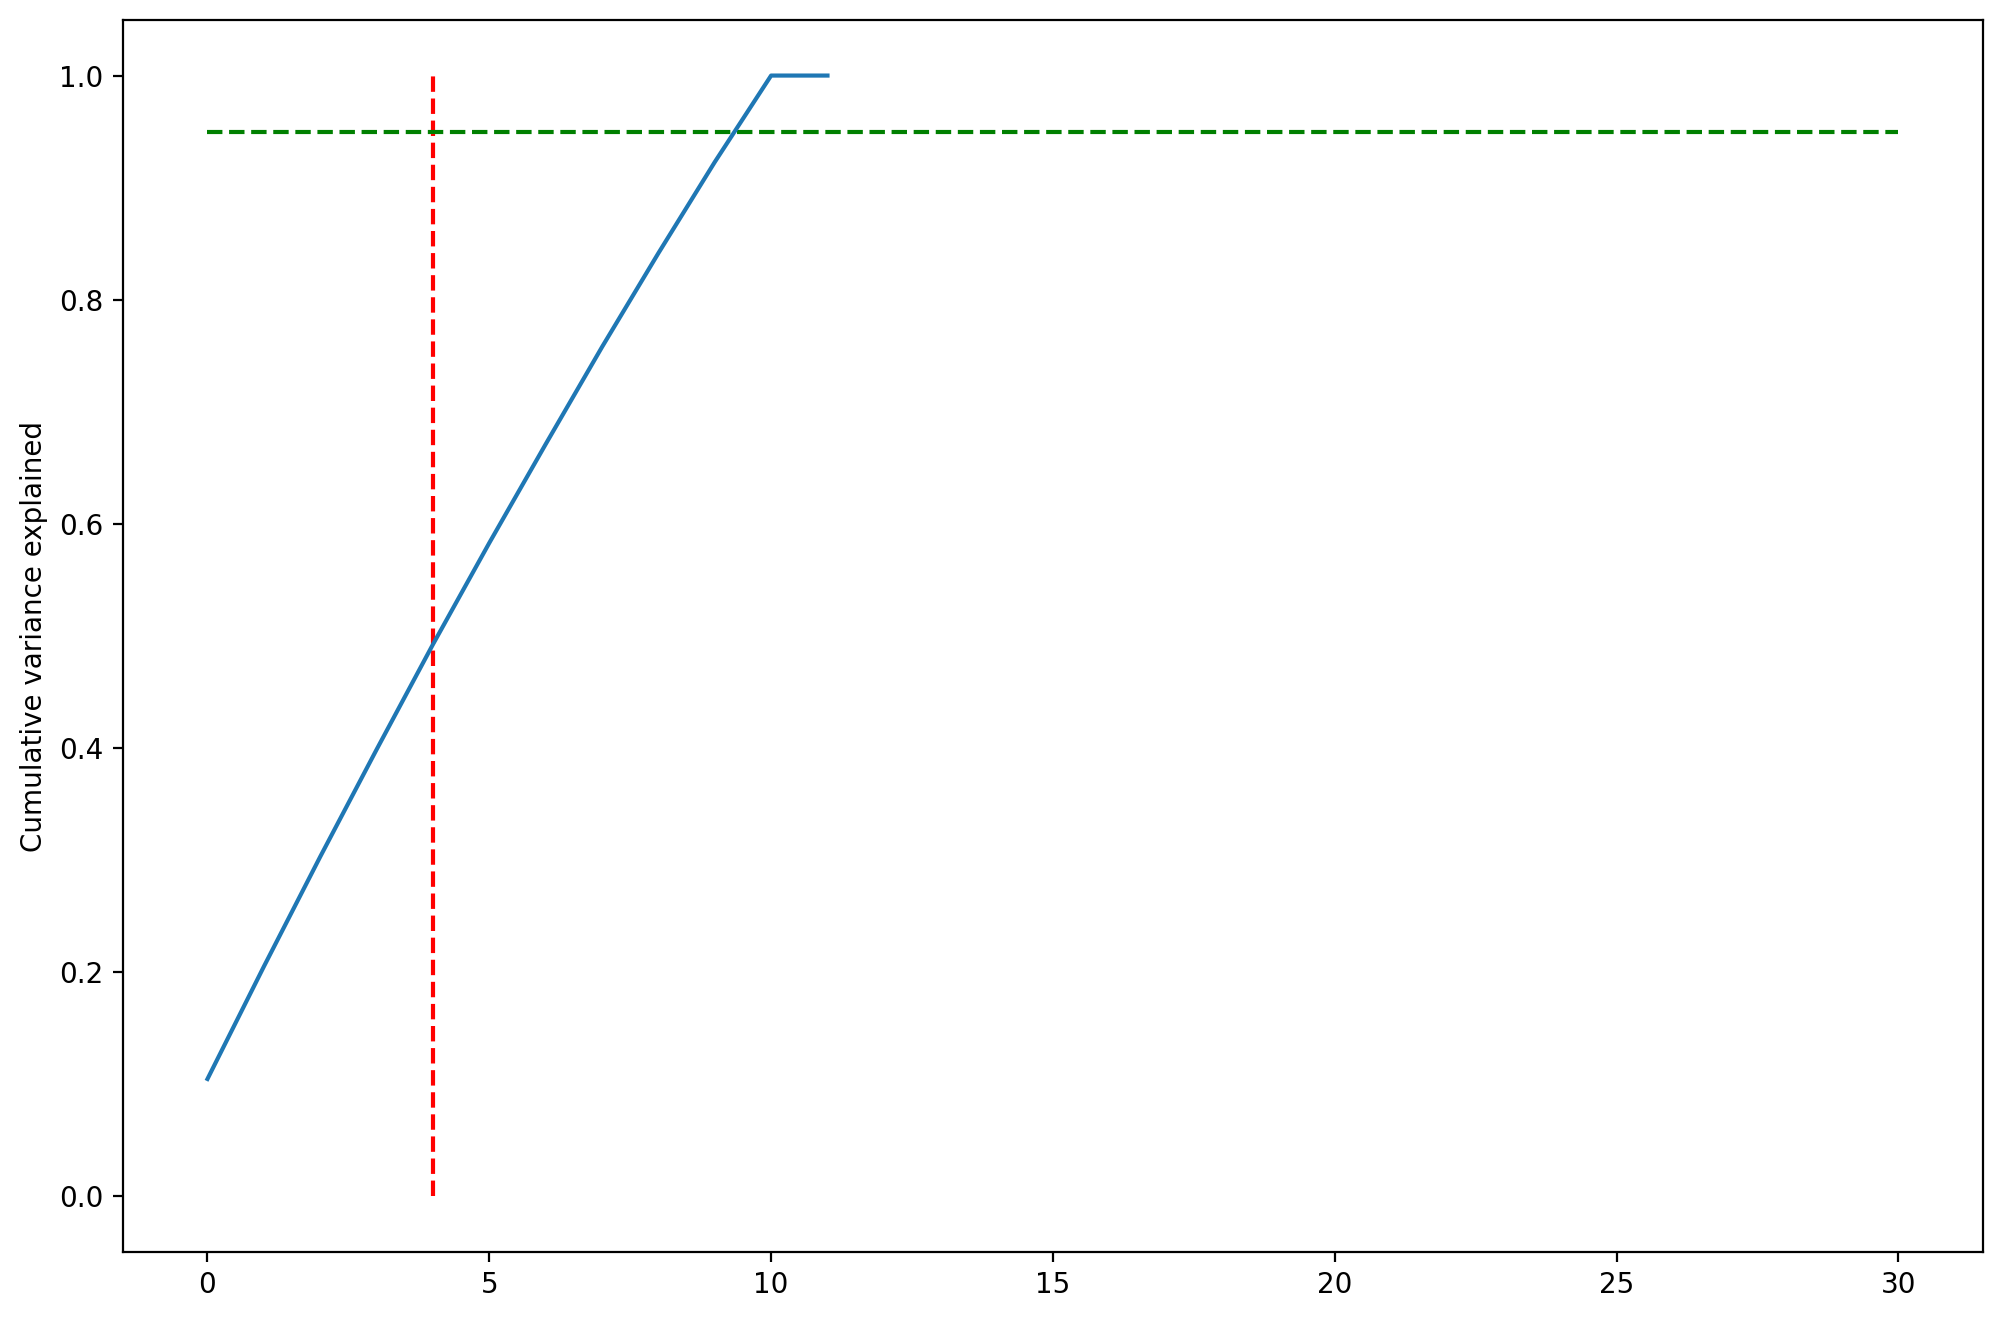

In [50]:
fig = plt.figure(figsize=[12,8],dpi=200)
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()


In [51]:
from sklearn.decomposition import IncrementalPCA

In [52]:
pca_final = IncrementalPCA(n_components=7)


In [53]:
X_pca_final = pca_final.fit_transform(X_scaled)

In [54]:
print(X.shape)
print(X_pca_final.shape)

(9984, 11)
(2021, 7)


In [55]:
corrmat = np.corrcoef(X_pca_final.transpose())


In [56]:
corrmat.shape

(7, 7)

In [57]:
len(X_pca_final)

2021

In [58]:
dm = gower.gower_matrix(X_pca_final)

In [59]:
z = linkage(dm, method='complete',metric='euclidean')

/tmp/ipykernel_4149/2021749723.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = linkage(dm, method='complete',metric='euclidean')


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [20.0, 20.0, 42.5, 42.5],
  [5.0, 5.0, 31.25, 31.25],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [72.5, 72.5, 102.5, 102.5],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [150.0, 150.0, 172.5, 172.5],
  [130.0, 130.0, 161.25, 161.25],
  [87.5, 87.5, 145.625, 145.625],
  [18.125, 18.125, 116.5625, 116.5625],
  [195.0, 195.0, 205.0, 205.0],
  [215.0, 215.0, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [220.0, 220.0, 240.0, 240.0],
  [200.0, 200.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [295.0, 295.0, 305.0, 305.0],
  [280.0, 280.0, 300.0, 300.0],
  [260.0, 260.0, 290.0, 290.0],
  [215.0, 215.0, 275.0, 275.0],
  [67.34375, 67.34375, 245.0, 245.0],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 33

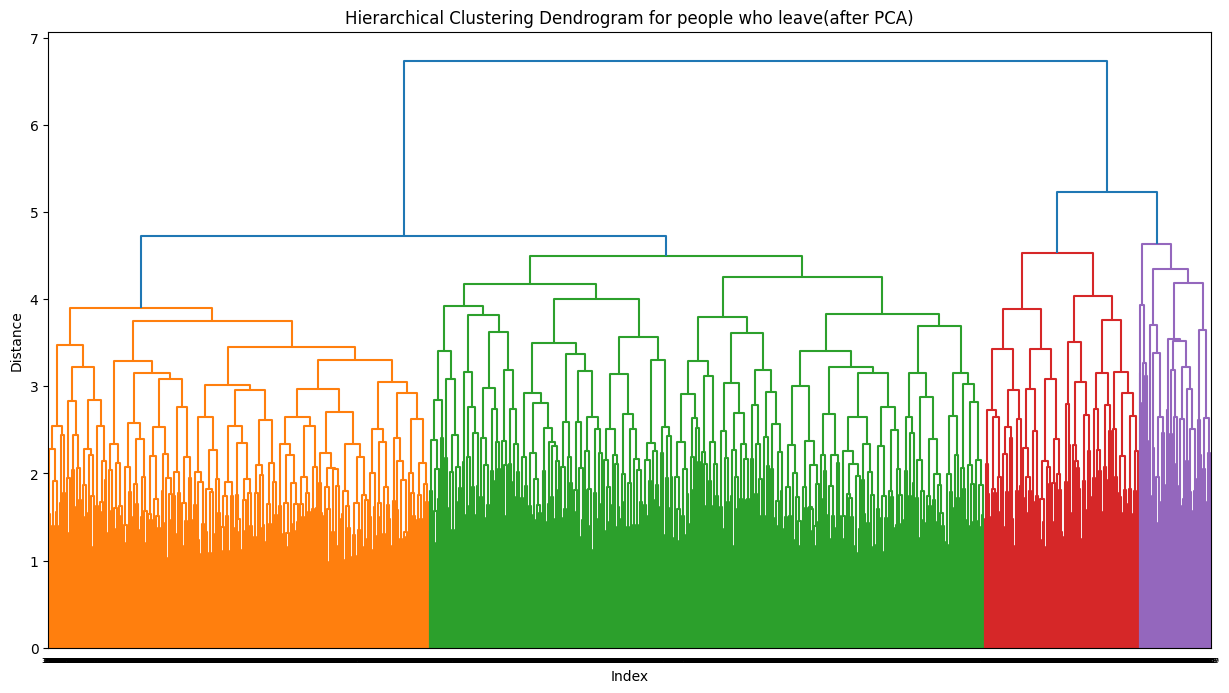

In [60]:
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram for people who leave(after PCA)');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation = 0,  leaf_font_size = 5 ) 



In [61]:
churn_clust = fcluster(z, 4, criterion='maxclust')

In [62]:
churn_clust

array([2, 2, 2, ..., 2, 2, 1], dtype=int32)

In [63]:
len(churn_clust)

2021

In [64]:
print('Dataset describe results according to the "left==1" ')
churn[churn['churn'] == 1].describe().T.style.background_gradient(subset = ['mean','min','50%', 'max'], cmap = 'RdPu')

Dataset describe results according to the "left==1" 


,count,mean,std,min,25%,50%,75%,max
customer_id,2021.000000,15689841.925779,72688.403662,15565706.000000,15627305.000000,15688951.000000,15752342.000000,15815656.000000
credit_score,2021.000000,647.589312,97.494288,386.000000,580.000000,647.000000,717.000000,850.000000
country,2021.000000,1.803563,0.748931,1.000000,1.000000,2.000000,2.000000,3.000000
gender,2021.000000,0.440871,0.496614,0.000000,0.000000,0.000000,1.000000,1.000000
age,2021.000000,44.847600,9.762959,18.000000,38.000000,45.000000,51.000000,84.000000
tenure,2021.000000,4.937655,2.933263,0.000000,2.000000,5.000000,8.000000,10.000000
balance,2021.000000,91143.407660,58335.885258,0.000000,39344.830000,109339.170000,131433.330000,250898.090000
products_number,2021.000000,1.475012,0.800368,1.000000,1.000000,1.000000,2.000000,4.000000
credit_card,2021.000000,0.698169,0.459166,0.000000,0.000000,1.000000,1.000000,1.000000
active_member,2021.000000,0.361702,0.480612,0.000000,0.000000,0.000000,1.000000,1.000000


In [65]:
X_churn.iloc[:,:].groupby(churn_clust).mean()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1,648.368024,1.856712,0.352941,43.496229,5.355958,110925.563318,1.396682,0.723982,0.307692,112666.840709,1.0
2,647.867358,1.798964,0.516062,44.967876,4.656995,94209.425264,1.442487,0.751295,0.345078,88413.825534,1.0
3,630.070632,1.442379,0.431227,48.925651,4.498141,36922.158253,1.446097,0.568773,0.468401,105501.993011,1.0
4,679.266129,2.338710,0.346774,42.290323,5.838710,79137.277823,2.209677,0.427419,0.548387,129672.252581,1.0


Final Inferences  :
    1--> Descent credit_score very good balance ,good Salary (2ND PRIORITY)

    2--> majority (3RD PRIORITY)

    3-->Low balance,low cred score , (LEAST PRIORITY)
    
    4--> cluster with highest cred score and highest salary, smallest group (TOP PRIORITY)

In [66]:
Xchurn_new = X_churn
Xchurn_new['cluster'] = churn_clust.tolist()

Xchurn_new

/tmp/ipykernel_4149/4244490195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xchurn_new['cluster'] = churn_clust.tolist()


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,cluster
0,619,1,0,42,2,0.00,1,1,1,101348.88,1,2
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1,2
5,645,3,1,44,8,113755.78,2,1,0,149756.71,1,2
16,653,2,1,58,1,132602.88,1,1,0,5097.67,1,2
22,510,3,0,38,4,0.00,1,1,0,118913.53,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,498,2,1,42,3,152039.70,1,1,1,53445.17,1,1
9982,655,2,0,46,7,137145.12,1,1,0,115146.40,1,1
9991,597,1,0,53,4,88381.21,1,1,0,69384.71,1,2
9997,709,1,0,36,7,0.00,1,0,1,42085.58,1,2


In [67]:
Xchurn_new1 = Xchurn_new[Xchurn_new['cluster']==4]

**Customers from 4th clusters**

In [68]:
Xchurn_new1

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,cluster
30,591,3,0,39,3,0.00,3,1,0,140469.38,1,4
58,511,3,0,66,4,0.00,1,1,0,1643.11,1,4
90,647,3,0,44,5,0.00,3,1,1,174205.22,1,4
114,721,2,1,28,9,154475.54,2,0,1,101300.94,1,4
143,793,3,1,52,2,0.00,1,1,0,159123.82,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
9125,749,3,1,34,2,0.00,1,0,0,174189.04,1,4
9129,838,3,0,40,6,61671.19,1,0,1,150659.35,1,4
9215,584,2,0,37,10,134171.80,4,1,1,70927.11,1,4
9440,593,3,1,27,10,0.00,3,0,0,94620.00,1,4
